<a href="https://colab.research.google.com/github/florln/3fap/blob/main/credit_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [90]:
# inportter les packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import pickle


In [3]:
#lire la bd
df=pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [49]:
pd.set_option('display.max_rows',df.shape[0]+1)

In [50]:
df

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,0,0,2,5849.0,0.000000,128.0,360.0,1.0,1
1,1,1,1,0,0,0,4583.0,1508.000000,128.0,360.0,1.0,0
2,1,1,0,0,1,2,3000.0,0.000000,66.0,360.0,1.0,1
3,1,1,0,1,0,2,2583.0,2358.000000,120.0,360.0,1.0,1
4,1,0,0,0,0,2,6000.0,0.000000,141.0,360.0,1.0,1
5,1,1,2,0,1,2,5417.0,4196.000000,267.0,360.0,1.0,1
6,1,1,0,1,0,2,2333.0,1516.000000,95.0,360.0,1.0,1
7,1,1,3,0,0,1,3036.0,2504.000000,158.0,360.0,0.0,0
8,1,1,2,0,0,2,4006.0,1526.000000,168.0,360.0,1.0,1
9,1,1,1,0,0,1,12841.0,10968.000000,349.0,360.0,1.0,0


In [4]:
# voir les valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
df.isnull().sum().sort_values(ascending=False)

,0
Credit_History,50
Self_Employed,32
LoanAmount,22
Dependents,15
Loan_Amount_Term,14
Gender,13
Married,3
Loan_ID,0
Education,0
ApplicantIncome,0


In [5]:
df.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [84]:
# renseigner les valeurs manquentes
cat_data=[]
num_data=[]
for i,c in enumerate(df.dtypes):
  if c==object:
    cat_data.append(df.iloc[:,i])
  else:
    num_data.append(df.iloc[:,i])
cat_data=pd.DataFrame(cat_data).transpose()
num_data=pd.DataFrame(num_data).transpose()


In [17]:
# pour les variables catégories on renplace les valeurs manquantes par les valeur qui se répète le plus
cat_data=cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any()

False

In [18]:
# pour les valeur numerique on va remplacer les valeurs manquentes par la valeur précédentes de la meme colonne
num_data.bfill(inplace=True)
num_data.isnull().sum().any()

False

In [19]:
# transformer la colonne target
target_value={'Y':1,'N':0}
target=cat_data['Loan_Status']
cat_data.drop('Loan_Status',axis=1,inplace=True)
target=target.map(target_value)
target

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [20]:
# remplacer les valeurs catégories par des valeurs numerique 1,2,3....
le=LabelEncoder()
for i in cat_data:
  cat_data[i]=le.fit_transform(cat_data[i])
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0
610,610,1,1,3,0,0,0
611,611,1,1,1,0,0,2
612,612,1,1,2,0,0,2


In [21]:
# supprimer loan_id
cat_data.drop('Loan_ID',axis=1,inplace=True)

In [12]:
# concatener cat_data et num_data et specifier la colonne target
X=pd.concat([cat_data,num_data],axis=1)
Y=target

In [22]:
Y

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [36]:
# on va commencer par la variable target
target.value_counts()

,count
Loan_Status,
1,422
0,192


In [26]:
# la bd utiliser pour EDA
# Concaténation correcte
df = pd.concat([cat_data, num_data, target], axis=1)


le pourcentage des credits accordés est:0.3127035830618892
le pourcentage des credits non accordés est:0.6872964169381107


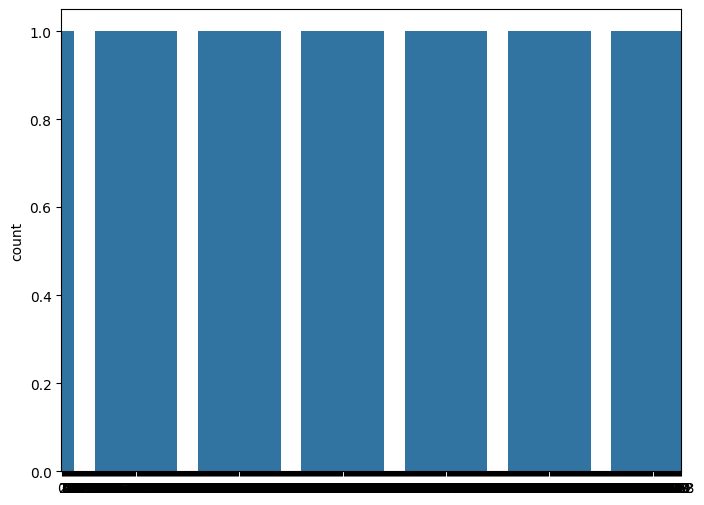

In [41]:
plt.figure(figsize=(8,6))
sns.countplot(target)
yes=target.value_counts()[0]/len(target)
no=target.value_counts()[1]/len(target)
print(f'le pourcentage des credits accordés est:{yes}')
print(f'le pourcentage des credits non accordés est:{no}')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


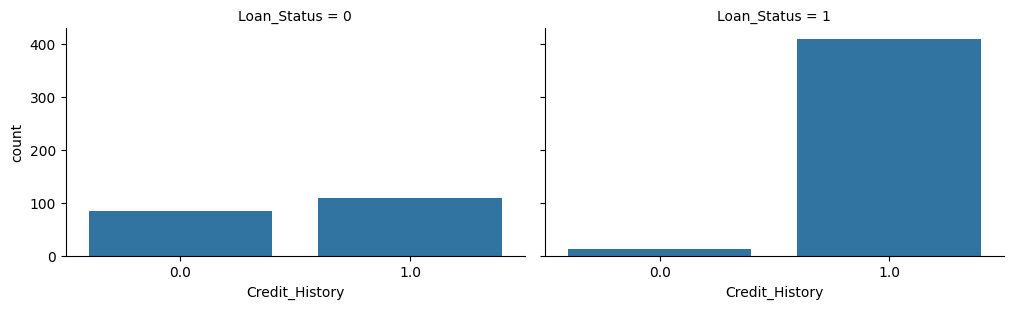

In [42]:
grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Credit_History')


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


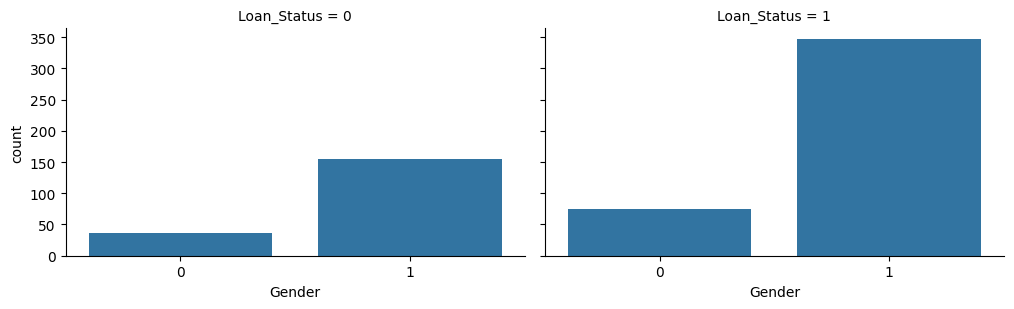

In [43]:
# sexe
grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Gender')


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


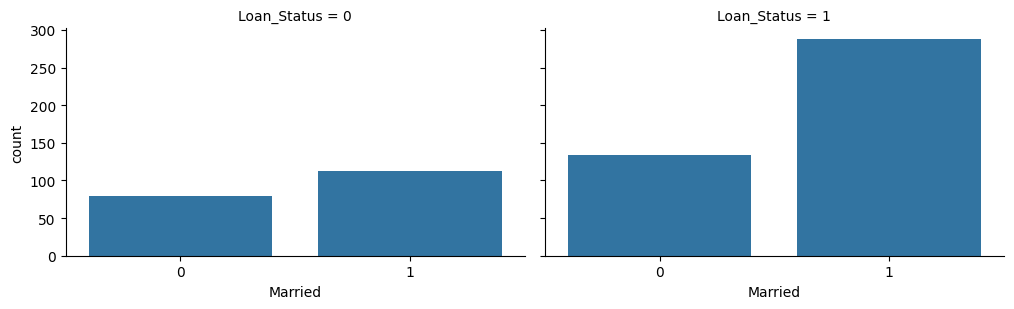

In [44]:
# sexe
grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Married')


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


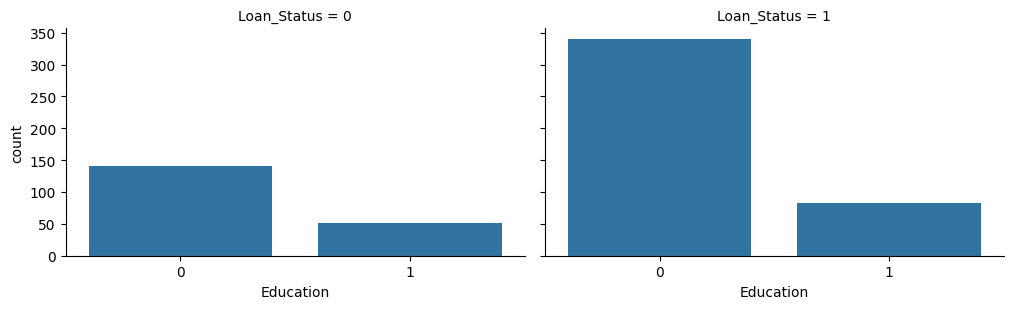

In [45]:
# Education
grid = sns.FacetGrid(df, col='Loan_Status', height=3.2, aspect=1.6)
grid.map(sns.countplot, 'Education')


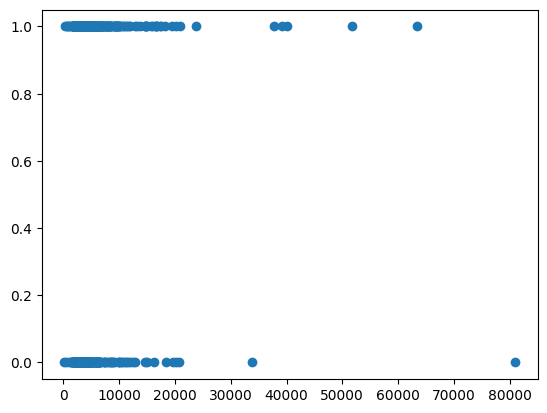

In [46]:
# revenu du demandeur
plt.scatter(df['ApplicantIncome'],df['Loan_Status'])

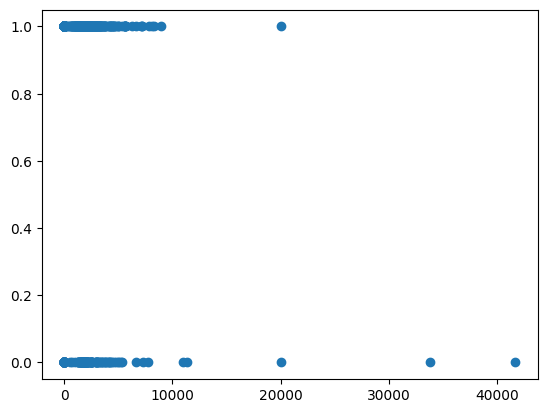

In [51]:
plt.scatter(df['CoapplicantIncome'],df['Loan_Status'])

In [65]:
df.groupby('Loan_Status').median()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,,,,,
0,1.0,1.0,0.0,0.0,0.0,1.0,3833.5,268.0,132.5,360.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,3812.5,1239.5,127.5,360.0,1.0


In [92]:
# diviser la bd en une bd test et d'entraînement
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Division des données en ensembles d'entraînement et de test
for train_index, test_index in sss.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

# Affichage des dimensions des ensembles
print('X_train taille: ', X_train.shape)
print('X_test taille: ', X_test.shape)
print('Y_train taille: ', Y_train.shape)
print('Y_test taille: ', Y_test.shape)


X_train taille:  (491, 11)
X_test taille:  (123, 11)
Y_train taille:  (491,)
Y_test taille:  (123,)


In [91]:
# Définition des modèles
models = {
    'LogisticRegression': LogisticRegression(random_state=42),
    'KNeighborsClassifier': KNeighborsClassifier(),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42)
}

# Fonction de calcul de la précision
def accu(y_true, y_pred, retu=False):
    acc = accuracy_score(y_true, y_pred)
    if retu:
        return acc
    else:
        print(f'La précision du modèle est : {acc}')

# Fonction d'entraînement et d'évaluation des modèles
def train_test_eval(models, X_train, Y_train, X_test, Y_test):
    for name, model in models.items():
        print(name, ':')
        model.fit(X_train, Y_train)
        accu(Y_test, model.predict(X_test))
        print('-' * 30)

# Exécuter la fonction
train_test_eval(models, X_train, Y_train, X_test, Y_test)

LogisticRegression :
La précision du modèle est : 0.8536585365853658
------------------------------
KNeighborsClassifier :
La précision du modèle est : 0.6504065040650406
------------------------------
DecisionTreeClassifier :
La précision du modèle est : 0.8455284552845529
------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [97]:
X_2=X[['Credit_History','Married','CoapplicantIncome']]


In [98]:
# diviser la bd en une bd test et d'entraînement
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Division des données en ensembles d'entraînement et de test
for train_index, test_index in sss.split(X_2, Y):
    X_train, X_test = X_2.iloc[train_index], X_2.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

# Affichage des dimensions des ensembles
print('X_train taille: ', X_train.shape)
print('X_test taille: ', X_test.shape)
print('Y_train taille: ', Y_train.shape)
print('Y_test taille: ', Y_test.shape)


X_train taille:  (491, 3)
X_test taille:  (123, 3)
Y_train taille:  (491,)
Y_test taille:  (123,)


In [100]:
train_test_eval(models, X_train, Y_train, X_test, Y_test)

LogisticRegression :
La précision du modèle est : 0.8536585365853658
------------------------------
KNeighborsClassifier :
La précision du modèle est : 0.6991869918699187
------------------------------
DecisionTreeClassifier :
La précision du modèle est : 0.8455284552845529
------------------------------


In [102]:
# appliquer la recression logistique sur la bd
Classifier=LogisticRegression()
Classifier.fit(X_2,Y)

LogisticRegression()

In [103]:
# enregistrement du modèle
pickle.dump(Classifier,open('model.pkl','wb'))